# **Linear Regression(SGD)**



---
Importing the required packages


---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\prakash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [3]:
housing_data = california_housing.fetch_california_housing()

In [4]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [5]:
df = df[df.Target < 5]
df = df[df.MedInc < 12]

In [6]:
X = df.MedInc
y = df.Target

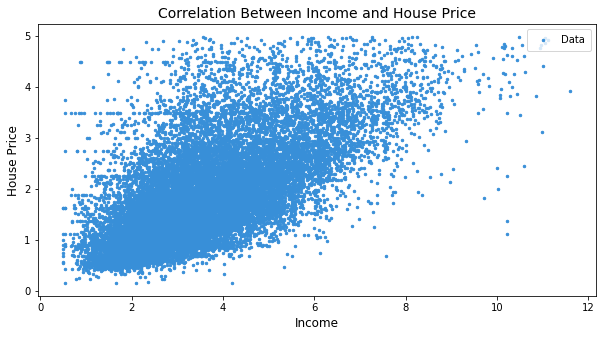

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [8]:
x = np.array(X.values)
y= np.array(y.values)

In [9]:
def Norm(x):
  minx = x.min()
  maxx = x.max()
  return np.array([(i - minx)/(maxx-minx) for i in x]).reshape(-1,1)
  
x = Norm(x)
y = Norm(y)
print("maximum value of MedInc = {}".format(x.max()) , 'shape' , x.shape)
print("maximum value of Target = {}".format(y.max()) , 'shape' , y.shape )

maximum value of MedInc = 1.0 shape (19639, 1)
maximum value of Target = 1.0 shape (19639, 1)


In [10]:
a = np.ones((x.shape[0] ,1))
x = np.hstack([a, x])

In [11]:
def SGD(x,y,lr = 0.01,epochs=100,batch_size = 1):
    w = np.array([1,1])
    m ,b = w[1] , w[0]
    mse = [mean_squared_error(y ,(m*x[:,1]+ b))]
    for _ in range(epochs):
        for index , i in enumerate(x):
            w1 = w - lr*(i.dot(w.T) - y[index])*i
            w = w1
        m ,b = w[1] , w[0]
        mse.append(mean_squared_error(y ,(m*x[:,1]+ b)))
    
    return m, b, mse

In [12]:
m, b,  mse = SGD(x, y, lr=0.01, epochs=100)
m,b

(0.7427076156192771, 0.06918425577769965)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 1.590597700034135


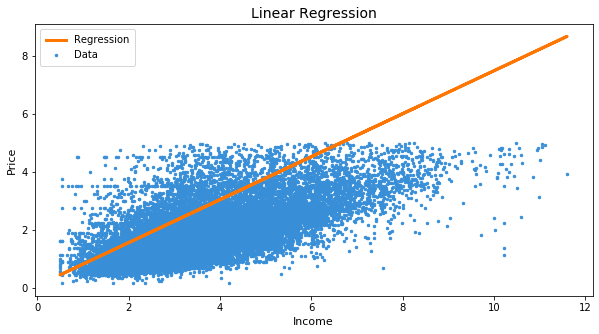

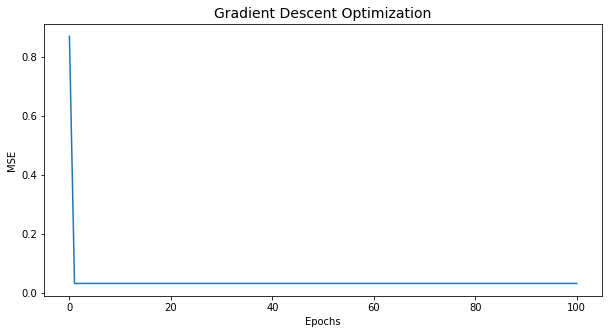

In [13]:
y_pred = m*X + b
print("MSE:",mean_squared_error(df.Target, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(df.MedInc, df.Target, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)                                                           #why?
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()